In [1]:
import os 
#lets change the path wit os first (to save file in data sets directory)
os.chdir(r'C:\Users\Eduardo\Documents\CARRERA\Udemy\deep_learning\course_1\week3\one_hidden_layer')
print(os.getcwd()) #lets make sure we are in the correct directory

C:\Users\Eduardo\Documents\CARRERA\Udemy\deep_learning\course_1\week3\one_hidden_layer


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [3]:
X, Y = load_planar_dataset()
### getting to know the data
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1] 
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


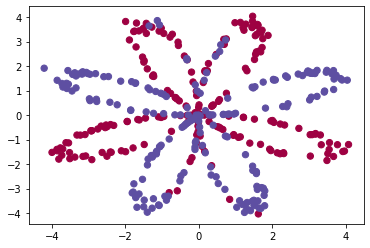

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.



**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$



In [5]:
def layer_sizes(X, Y,n_h):
    n_x = X.shape[0]
    n_h = n_h #we can see that the hidden unit has 4 units
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

def sigmoid(Z):
    s= 1/(1+np.exp(-Z))
    return s

In [6]:
###Initialite parameter

n_x, n_h, n_y = layer_sizes(X, Y,n_h=4)
W1 = np.random.randn(n_h, n_x)*0.01
b1 = np.random.randn(n_h, 1)*0
W2 = np.random.randn(n_y, n_h)*0.01
b2 = np.random.randn(n_y, 1)*0
learning_rate = 1.2
iteration = 10000
costs=[]
iter_list=[]

for i in range(iteration):
    ### forward porpagate
    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    
     ### Compute loglikelyhood and cos
    if  i % 100 == 0:
        logprobs = Y*np.log(A2)+(1-Y)*np.log(1-A2)
        cost = - (1/m)*np.sum(logprobs)
        costs.append(cost)
        iter_list.append(i)
    
    ### backpropagation                                 ## dA2 = -Y/A2 + (1-Y)/(1-A2)     (colapsed)
    dZ2 = A2-Y                      #start here --->    ## dz2 =  (-Y/A2 + (1-Y)/(1-A2))(A2(1-A2))  =  A2-Y 
    dW2 = (1/m)*dZ2.dot(A1.T)                           ## dW2 = dz2 A1T
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)        ## dWb = dz2  (sum dz2 since we have implemented vectorization)
    dZ1 = W2.T.dot(dZ2)*(1 - np.power(A1, 2))           ## dWz1 = W2T dz2 * (1-A1^2) #deriviation of tanh=(1-A1^2)
    dW1 = (1/m)*dZ1.dot(X.T)                            ## dw1 = dz1 XT
    db1 =(1/m)*np.sum(dZ1,axis=1,keepdims=True)         ## dw1 = dz1
                              # we use keepdims so we dont get (1,) (rank 1 array) we want to get (1,1)
     # Gradient descent

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2


predictions = (A2 > 0.5).astype(int)
Accuracy=(predictions==Y).sum()/m*100
print("Accuracy",Accuracy,"%")

Accuracy 91.25 %


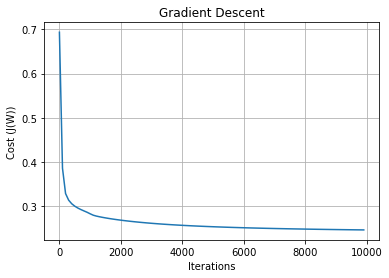

In [7]:
plt.plot(iter_list,costs)
plt.title("Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost (J(W))")
plt.grid()
plt.show()


In [8]:
parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
def predict(parameters, X):
    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    predictions = (A2 > 0.5)
    return predictions

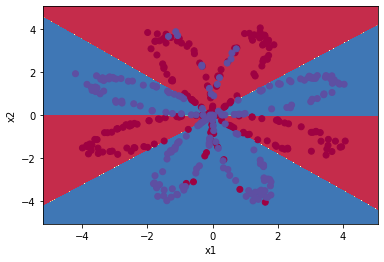

In [9]:
plot_decision_boundary(lambda x: predict(parameters , x.T), X, Y)

Accuracy 67.5 % number of units in hidden layer: 1 units
shape of W1 (1, 2)
shape of A1 (1, 400)
shape of W2 (1, 1)
shape of A2 (1, 400) 

Accuracy 67.25 % number of units in hidden layer: 2 units
shape of W1 (2, 2)
shape of A1 (2, 400)
shape of W2 (1, 2)
shape of A2 (1, 400) 

Accuracy 91.0 % number of units in hidden layer: 3 units
shape of W1 (3, 2)
shape of A1 (3, 400)
shape of W2 (1, 3)
shape of A2 (1, 400) 

Accuracy 90.75 % number of units in hidden layer: 4 units
shape of W1 (4, 2)
shape of A1 (4, 400)
shape of W2 (1, 4)
shape of A2 (1, 400) 

Accuracy 91.0 % number of units in hidden layer: 5 units
shape of W1 (5, 2)
shape of A1 (5, 400)
shape of W2 (1, 5)
shape of A2 (1, 400) 

Accuracy 91.25 % number of units in hidden layer: 20 units
shape of W1 (20, 2)
shape of A1 (20, 400)
shape of W2 (1, 20)
shape of A2 (1, 400) 

Accuracy 90.75 % number of units in hidden layer: 50 units
shape of W1 (50, 2)
shape of A1 (50, 400)
shape of W2 (1, 50)
shape of A2 (1, 400) 



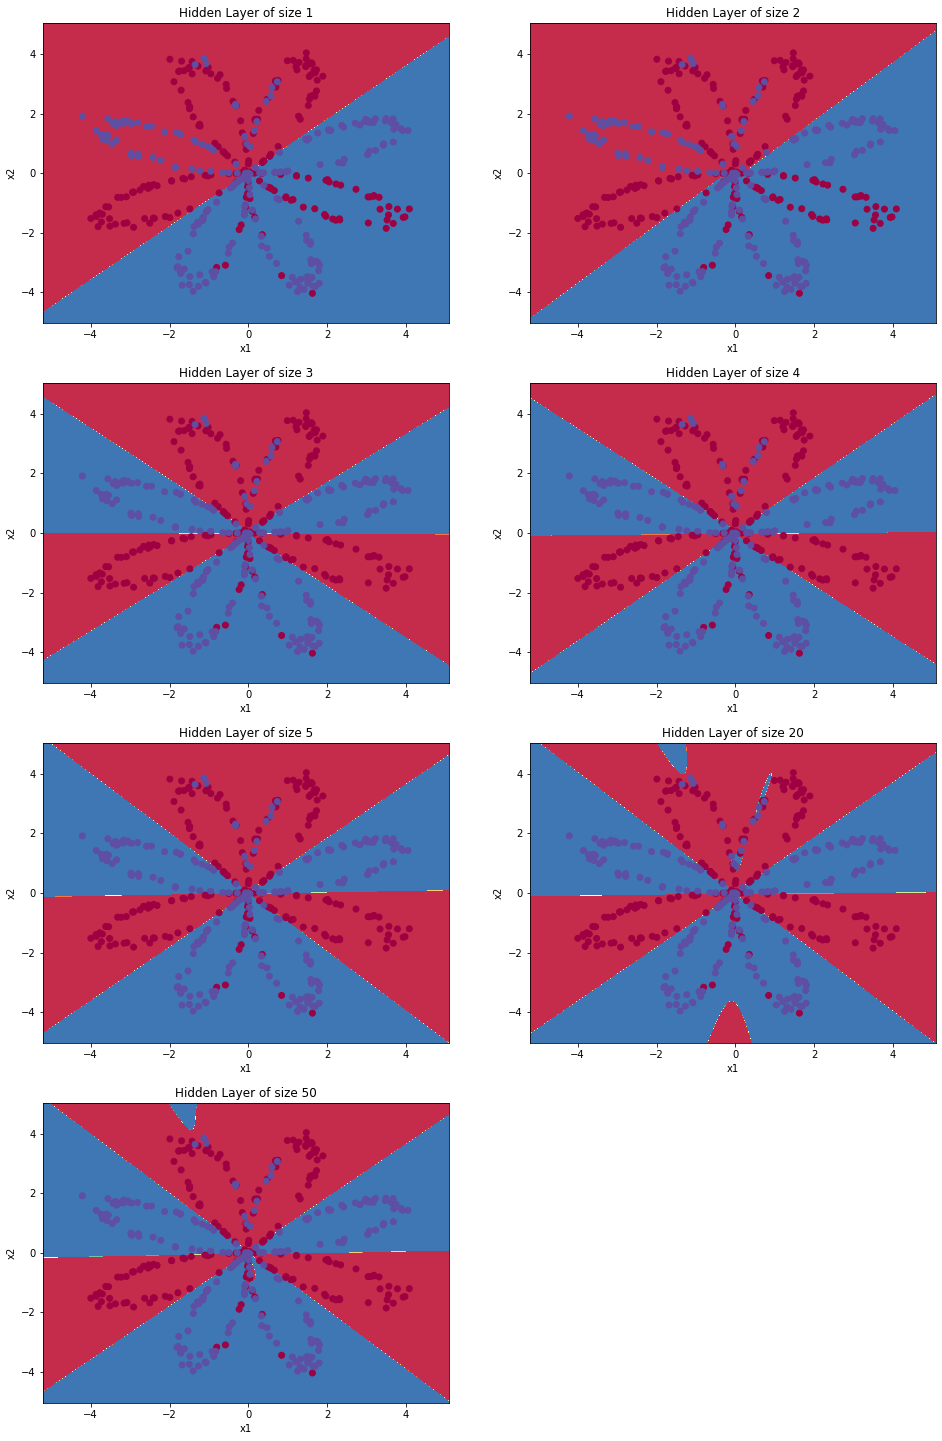

In [10]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i_n, n_h_i in enumerate(hidden_layer_sizes):
        ###Initialite parameter

    n_x, n_h, n_y = layer_sizes(X, Y,n_h=n_h_i )
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.random.randn(n_h, 1)*0
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.random.randn(n_y, 1)*0
    learning_rate = 1.2
    iteration = 10000
    costs=[]
    iter_list=[]

    for i in range(iteration):
        ### forward porpagate
        Z1 = W1.dot(X) + b1
        A1 = np.tanh(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = sigmoid(Z2)

         ### Compute loglikelyhood and cos
        if  i % 100 == 0:
            logprobs = Y*np.log(A2)+(1-Y)*np.log(1-A2)
            cost = - (1/m)*np.sum(logprobs)
            costs.append(cost)
            iter_list.append(i)

        ### backpropagation
        dZ2 = A2-Y
        dW2 = (1/m)*dZ2.dot(A1.T)
        db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
        dZ1 = W2.T.dot(dZ2)*(1 - np.power(A1, 2))
        dW1 = (1/m)*dZ1.dot(X.T)
        db1 =(1/m)*np.sum(dZ1,axis=1,keepdims=True)

         # Gradient descent

        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2
        
    predictions = (A2 > 0.5).astype(int)
    Accuracy=(predictions==Y).sum()/m*100
    print("Accuracy",Accuracy,"%","number of units in hidden layer:",n_h_i,"units")
    print("shape of W1",W1.shape)
    print("shape of A1",A1.shape)
    print("shape of W2",W2.shape)
    print("shape of A2",A2.shape,"\n")
    
    #plot
    plt.subplot(5, 2, i_n+1)
    plt.title('Hidden Layer of size %d' % n_h_i)
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    plot_decision_boundary(lambda x: predict(parameters , x.T), X, Y)